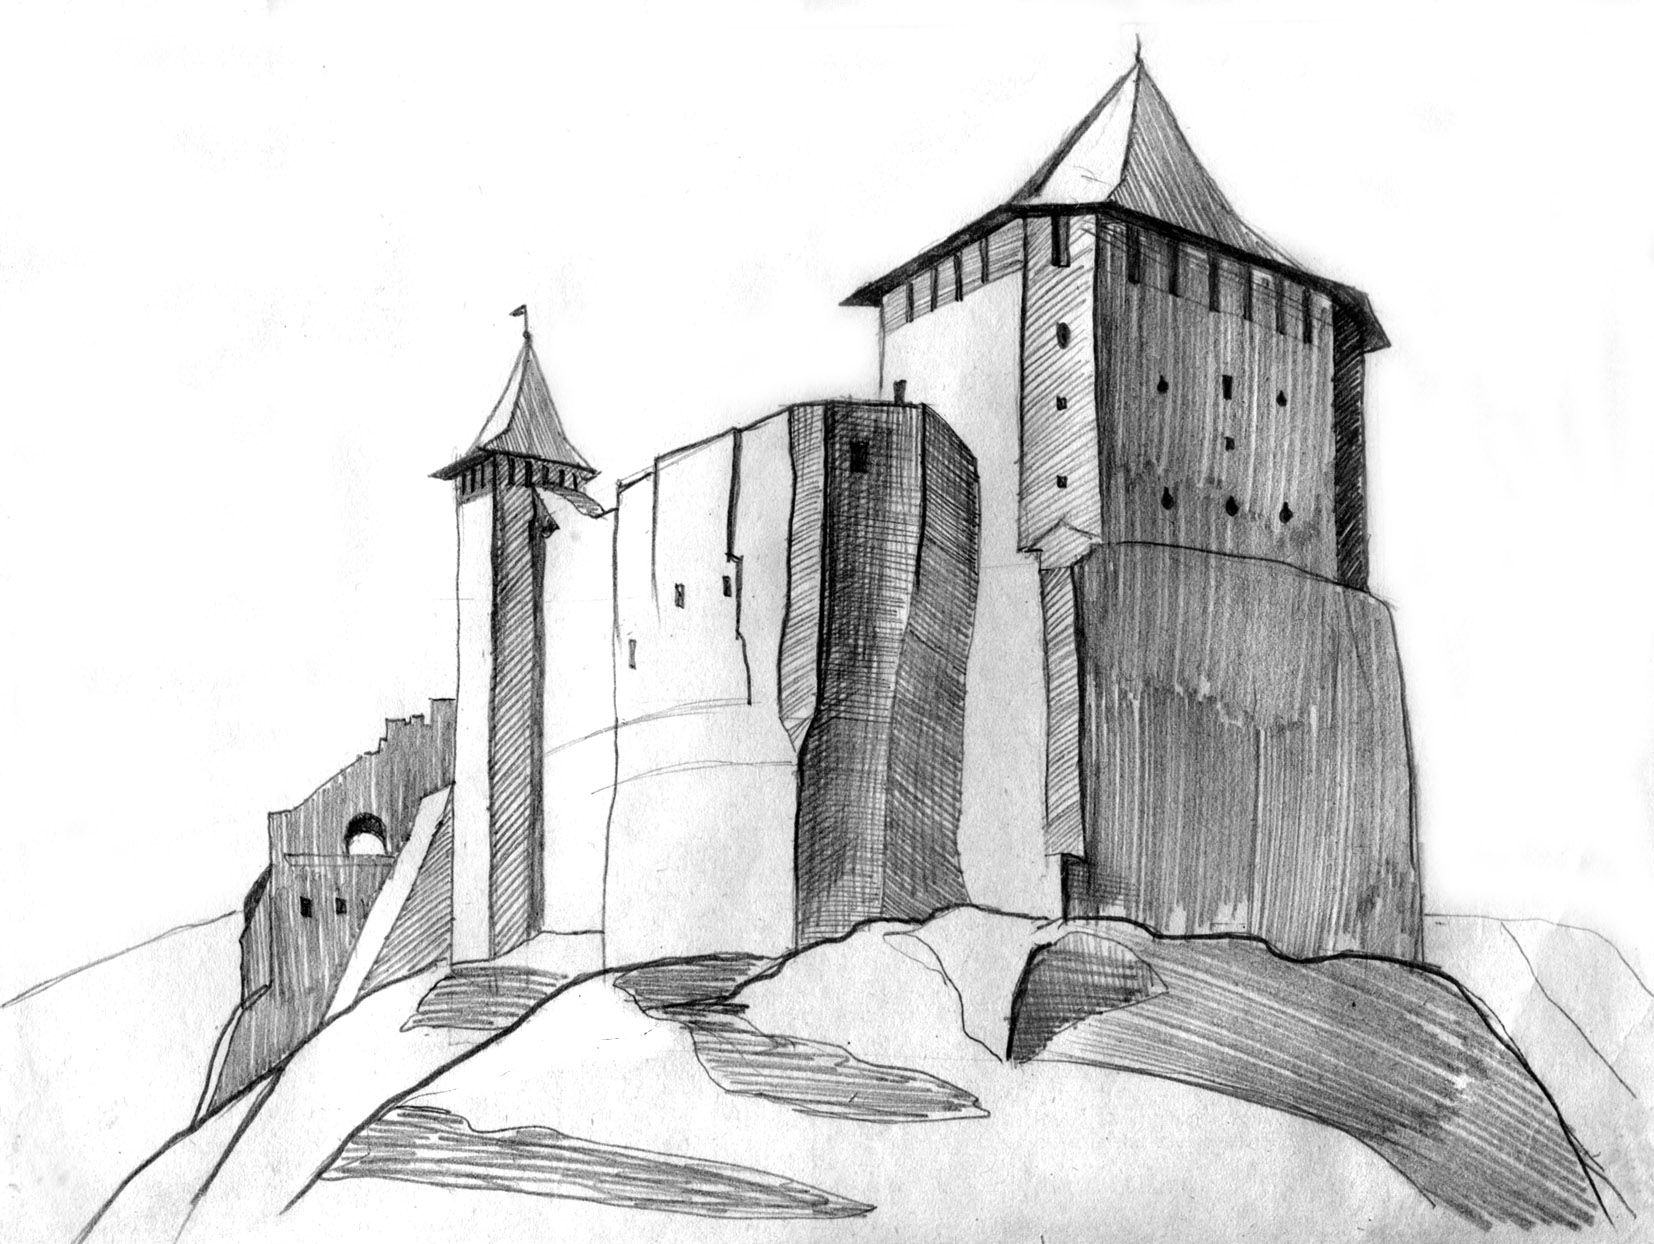

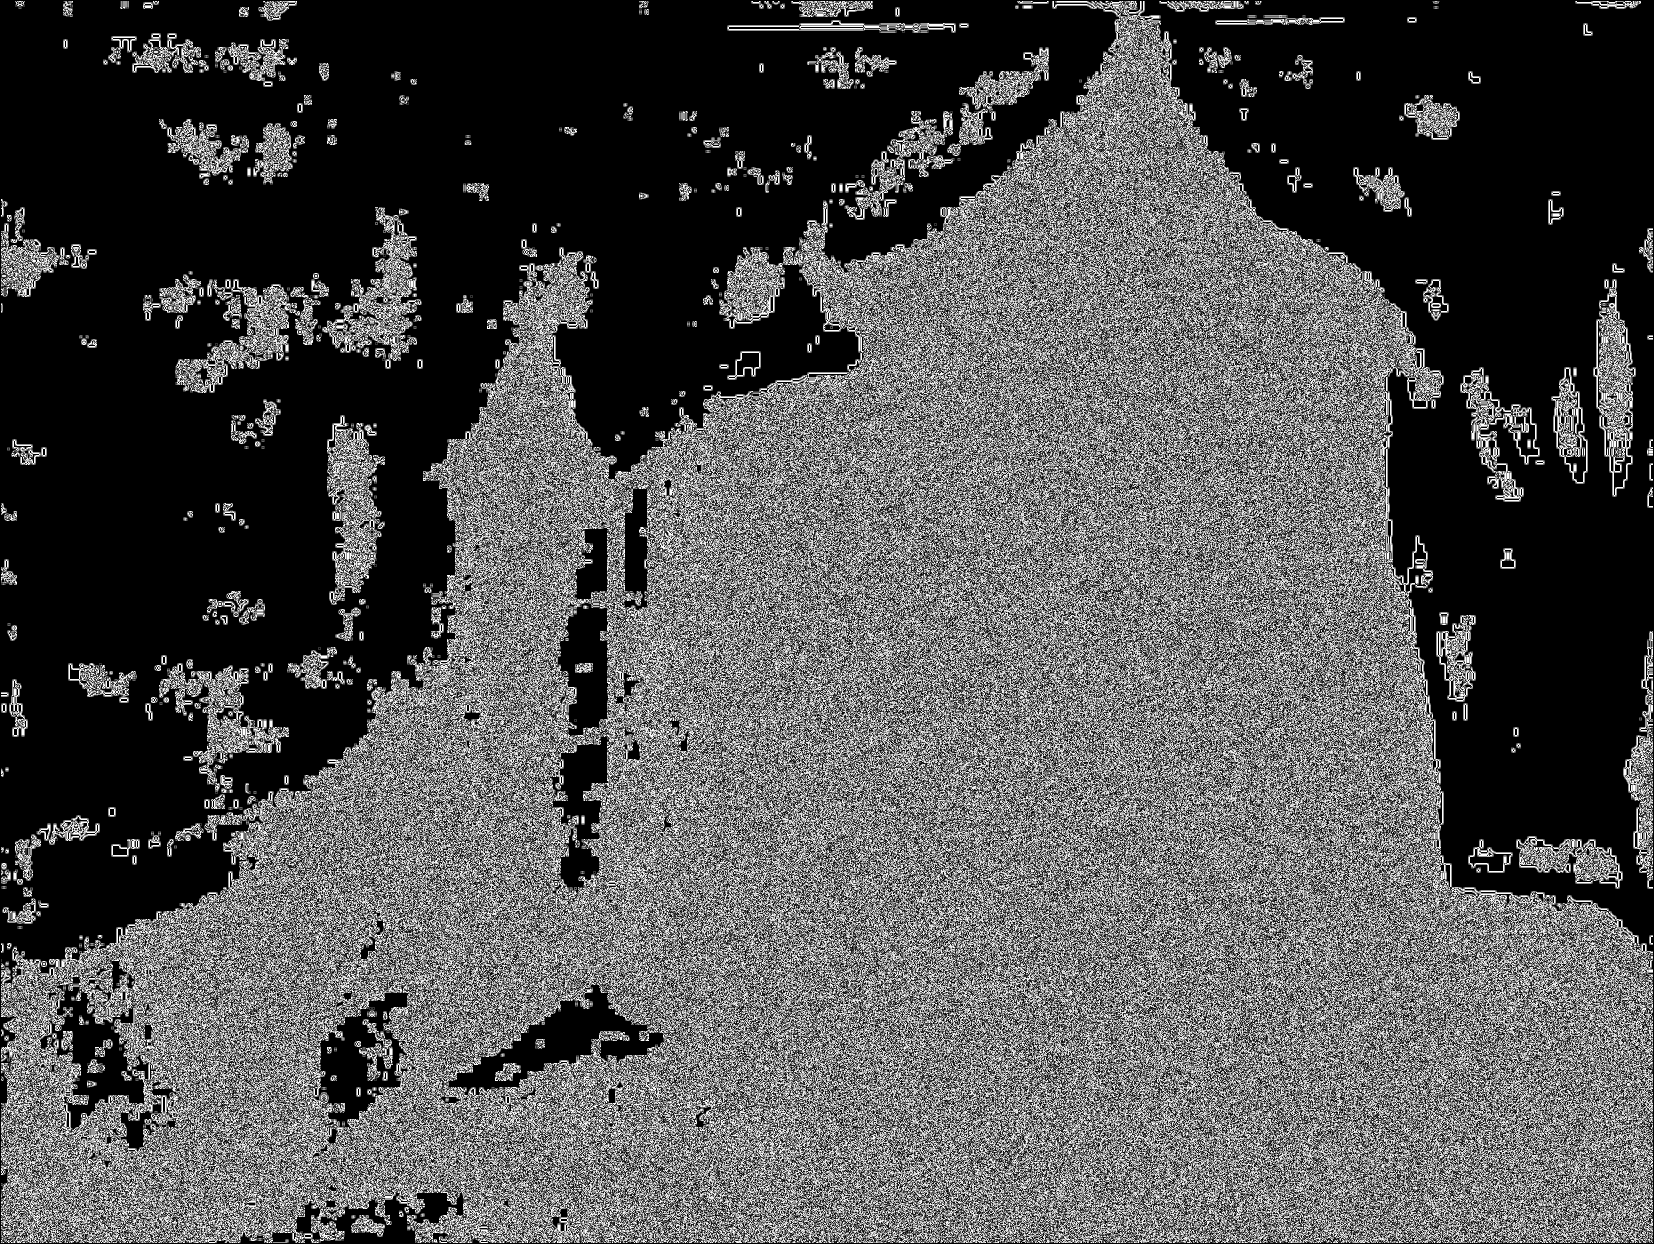

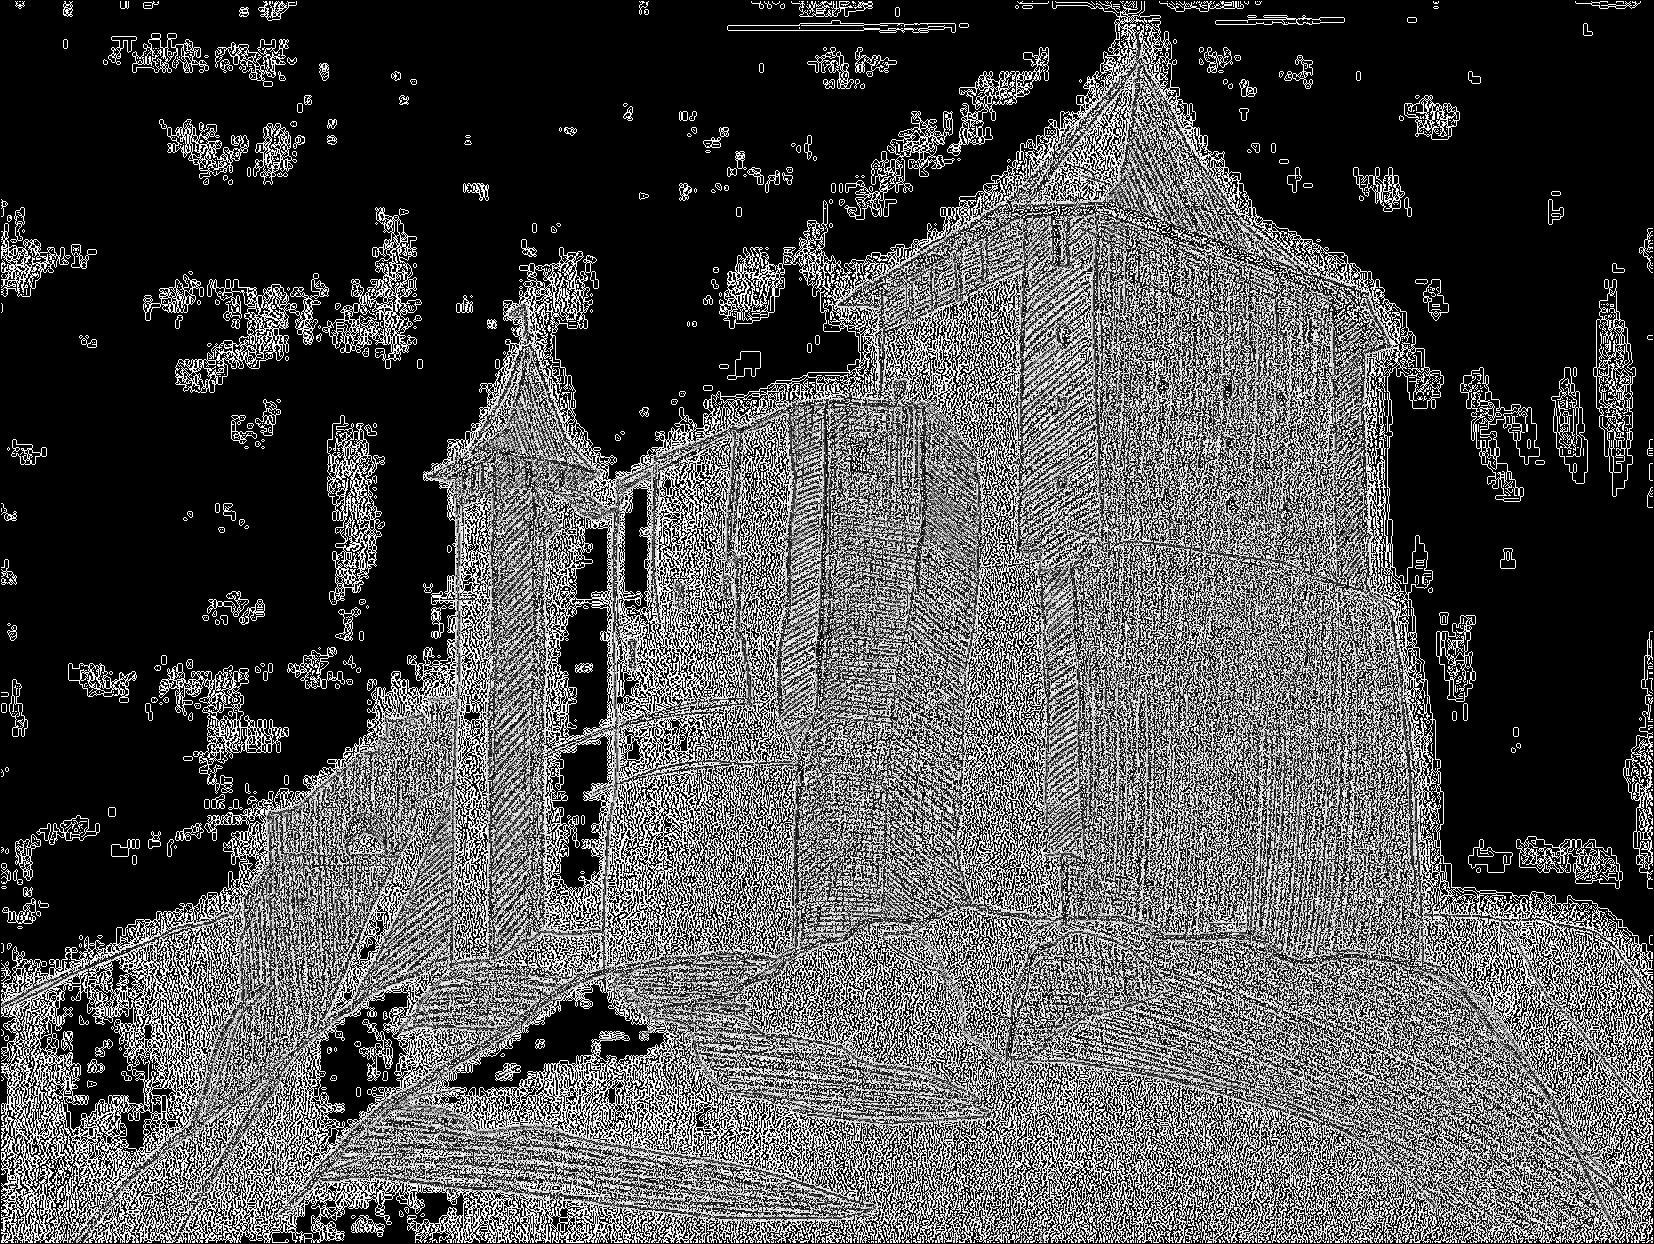

In [ ]:
from PIL import Image
import numpy as np

# завантаження зображення
img = Image.open('img1.jpg')

# перетворення зображення у градації сірого
gray_img = img.convert('L')

# перетворення градацій сірого у numpy масив
gray_img_array = np.asarray(gray_img)

def kirsch_operator(img):
    height, width = img.shape

    # 8 фільтрів оператора Kirsch
    filters = np.array([
        [[5, 5, 5], [-3, 0, -3], [-3, -3, -3]],
        [[5, 5, -3], [5, 0, -3], [-3, -3, -3]],
        [[5, -3, -3], [5, 0, -3], [5, -3, -3]],
        [[-3, -3, -3], [5, 0, -3], [5, 5, -3]],
        [[-3, -3, -3], [-3, 0, -3], [5, 5, 5]],
        [[-3, -3, -3], [-3, 0, 5], [-3, 5, 5]],
        [[-3, -3, 5], [-3, 0, 5], [-3, -3, 5]],
        [[-3, 5, 5], [-3, 0, 5], [-3, -3, -3]]
    ])

    # розмір маски
    mask_size = 3

    # вихідне зображення
    out_img = np.zeros((height, width))

    # застосування фільтрів
    for y in range(height - mask_size + 1):
        for x in range(width - mask_size + 1):
            # область зображення, на яку накладається фільтр
            region = img[y:y+mask_size, x:x+mask_size]

            # застосування фільтрів
            conv_result = np.sum(region * filters, axis=(1, 2))
            max_val = np.max(conv_result)

            # встановлення значення пікселя у вихідному зображенні
            # нормалізація значень
            out_img[y+1, x+1] = max_val / 15 * 255

    # конвертація до типу uint8
    out_img = out_img.astype(np.uint8)

    return out_img


def laplacian_operator(img):
    height, width = img.shape

    # маска оператора Laplacian
    mask = np.array([
        [0, 1, 0],
        [1, -4, 1],
        [0, 1, 0]
    ])

    # вихідне зображення
    out_img = np.zeros((height, width))

    # розмір маски
    mask_size = 3

    # застосування маски
    for y in range(height - mask_size + 1):
        for x in range(width - mask_size + 1):
            # область зображення, на яку накладається маска
            region = img[y:y+mask_size, x:x+mask_size]

            # застосування маски
            conv_result = np.sum(region * mask)

            # встановлення значення пікселя у вихідному зображенні
            out_img[y+1, x+1] = conv_result

    # конвертація до типу uint8
    out_img = out_img.astype(np.uint8)

    return out_img


# застосування оператора Kirsch
kirsch_img = kirsch_operator(gray_img_array)

# застосування оператора Laplacian
laplacian_img = laplacian_operator(gray_img_array)

# відображення результатів
Image.fromarray(kirsch_img).show()
Image.fromarray(laplacian_img).show()

